In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv("marketing.csv")

In [3]:
data.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,13300,36,Female,47648.0,Email,Consideration,893.7554921892273,0.132078,0.198063,38,6.900081,11.923316,9,3,6,1,1139,IsConfid,ToolConfid,1
1,10429,32,Female,47491.0,Email,Consideration,7330.251375088103,0.120810,0.088416,27,4.589390,NaN,33,0,2,4,3772,IsConfid,ToolConfid,1
2,10557,52,Male,83830.0,Referral,Awareness,7720.360685483039,0.125472,0.082197,35,7.403157,0.660581,29,1,3,0,3611,IsConfid,ToolConfid,1
3,12602,52,Male,116342.0,Social Media,Consideration,8337.45315727269,0.158739,0.089032,25,9.367090,12.218421,72,3,7,4,1173,IsConfid,ToolConfid,1
4,8592,58,Female,90994.0,Email,Retention,5273.098832292671,0.226054,0.099792,13,7.968767,4.894079,41,16,7,0,1102,IsConfid,ToolConfid,1
5,9926,28,Male,NaN,PPC,Conversion,6140.692084655652,0.290509,0.061431,8,2.342393,NaN,79,17,3,7,902,IsConfid,ToolConfid,1
6,8926,25,Male,45493.0,SEO,Retention,9580.333882970706,0.181050,0.105205,7,4.205543,3.870341,37,11,6,2,3157,IsConfid,ToolConfid,1
7,8934,44,Male,56253.0,PPC,Consideration,7257.788852501013,0.059053,0.139160,14,8.027403,1.555812,34,12,1,4,3289,IsConfid,ToolConfid,1
8,14022,33,Female,127318.0,Social Media,Conversion,1893.8409330689187,0.061941,0.111206,5,4.829093,11.948463,13,7,0,2,4968,IsConfid,ToolConfid,1
9,10706,59,Female,108909.0,Referral,Conversion,526.0384147362745,0.035578,0.103091,25,9.625184,11.462090,89,10,9,0,374,IsConfid,ToolConfid,1


**Bivariate**

In [4]:
def describe_num_num_relationship(df, col1, col2):
    """تحلیل رابطه بین دو متغیر عددی"""
    # آزمون نرمال بودن با شاپیرو
    shapiro1_stat, shapiro1_p = stats.shapiro(df[col1])
    shapiro2_stat, shapiro2_p = stats.shapiro(df[col2])
    
    # تشخیص نرمال بودن (p > 0.05 یعنی نرمال)
    is_normal1 = shapiro1_p > 0.05
    is_normal2 = shapiro2_p > 0.05
    both_normal = is_normal1 and is_normal2
    
    # انتخاب آزمون مناسب
    if both_normal:
        # استفاده از پیرسون
        corr_stat, p_value = stats.pearsonr(df[col1], df[col2])
        test_used = 'Pearson'
        correlation = corr_stat
    else:
        # استفاده از اسپیرمن
        corr_stat, p_value = stats.spearmanr(df[col1], df[col2])
        test_used = 'Spearman'
        correlation = corr_stat
    
    r2_score = correlation ** 2
    
    info = {
        'shapiro_p_col1': f'{shapiro1_p:.5f}',
        'shapiro_p_col2': f'{shapiro2_p:.5f}',
        'col1_normal': is_normal1,
        'col2_normal': is_normal2,
        'test_used': test_used,
        'correlation': f'{correlation:.5f}',
        'r_squared': f'{r2_score:.5f}',
        'p_value': f'{p_value:.5f}',
        'significant': p_value < 0.05,
        'relationship_strength': 'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.3 else 'weak',
        'relationship_direction': 'positive' if correlation > 0 else 'negative'
    }
    
    # رسم نمودار
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'{col1} vs {col2} - {test_used} Correlation', fontsize=14)

    # Scatter Plot
    axes[0].scatter(df[col1], df[col2],
                    s=60, alpha=0.7, color='blue', edgecolors='black', linewidth=0.5)
    axes[0].set_title('Scatter Plot')
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel(col2)
    axes[0].grid(True, alpha=0.3)

    # Hexbin Plot
    axes[1].hexbin(df[col1], df[col2], gridsize=20, cmap='Blues', mincnt=1)
    axes[1].set_title('Hexbin Plot')
    axes[1].set_xlabel(col1)
    axes[1].set_ylabel(col2)
    axes[1].yaxis.set_label_position("right")
    
    plt.tight_layout()
    plt.show()
    
    info_df = pd.DataFrame.from_dict(info, orient='index', columns=[''])
    print('='*15 + f' {col1} vs {col2} ' + '='*15)
    print(info_df)
    print('='*50)




In [5]:
def describe_cat_num_relationship(df, cat_col, num_col):
    """تحلیل رابطه بین متغیر کیفی و کمی"""
    # محاسبه آمار
    groups = df.groupby(cat_col)[num_col].describe()
    
    # آزمون نرمال بودن با شاپیرو برای هر گروه
    normality_results = {}
    group_data = []
    all_normal = True
    
    for name, group in df.groupby(cat_col):
        if len(group) >= 3:  # شاپیرو حداقل 3 داده نیاز داره
            shapiro_stat, shapiro_p = stats.shapiro(group[num_col])
            is_normal = shapiro_p > 0.05
            normality_results[name] = {
                'shapiro_p': f'{shapiro_p:.5f}',
                'is_normal': is_normal
            }
            if not is_normal:
                all_normal = False
        else:
            normality_results[name] = {
                'shapiro_p': 'N/A (too few data)',
                'is_normal': False
            }
            all_normal = False
        
        group_data.append(group[num_col].values)
    
    # انتخاب آزمون مناسب
    if all_normal:
        # استفاده از ANOVA معمولی
        f_stat, p_value = stats.f_oneway(*group_data)
        test_used = 'ANOVA'
    else:
        # استفاده از Welch's ANOVA
        try:
            from scipy.stats import alexandergovern
            # اگر alexandergovern موجود نباشه، از kruskal استفاده می‌کنیم
            result = alexandergovern(*group_data)
            f_stat, p_value = result.statistic, result.pvalue
            test_used = "Welch's ANOVA"
        except ImportError:
            # fallback به Kruskal-Wallis (non-parametric)
            f_stat, p_value = stats.kruskal(*group_data)
            test_used = 'Kruskal-Wallis (non-parametric)'
    
    info = {
        'test_used': test_used,
        'all_groups_normal': all_normal,
        'f_statistic': f'{f_stat:.5f}',
        'p_value': f'{p_value:.5f}',
        'significant_difference': p_value < 0.05,
        'num_categories': df[cat_col].nunique(),
        'total_observations': len(df)
    }
    
    # رسم نمودار
    fig = plt.subplots(2, 2, figsize=(14, 10))
    
    # Box plot
    ax1 = plt.subplot(221)
    sns.boxplot(data=df, x=cat_col, y=num_col)
    ax1.set_title(f'{num_col} by {cat_col}')
    plt.xticks(rotation=45)
    
    # Violin plot
    ax2 = plt.subplot(222)
    sns.violinplot(data=df, x=cat_col, y=num_col)
    ax2.set_title(f'{num_col} Distribution by {cat_col}')
    plt.xticks(rotation=45)
    
    # Bar plot of means
    ax3 = plt.subplot(223)
    means = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
    sns.barplot(x=means.index, y=means.values)
    ax3.set_title(f'Mean {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    
    # Count plot of categories
    ax4 = plt.subplot(224)
    sns.countplot(data=df, x=cat_col)
    ax4.set_title(f'Count of {cat_col}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print('='*15 + f' {cat_col} vs {num_col} ' + '='*15)
    print("Group Statistics:")
    print(groups)
    print(f"\nNormality Test Results (Shapiro-Wilk):")
    for group_name, result in normality_results.items():
        print(f"{group_name}: p-value = {result['shapiro_p']}, Normal = {result['is_normal']}")
    print(f"\n{test_used} Test Results:")
    info_df = pd.DataFrame.from_dict(info, orient='index', columns=[''])
    print(info_df)
    print('='*50)

In [6]:
def describe_cat_cat_relationship(df, col1, col2):
    """تحلیل رابطه بین دو متغیر کیفی"""
    # جدول تطبیقی
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # آزمون کای دو
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # ضریب کرامر V
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    info = {
        'chi2_statistic': f'{chi2:.5f}',
        'p_value': f'{p_value:.5f}',
        'degrees_of_freedom': dof,
        'cramers_v': f'{cramers_v:.5f}',
        'association_strength': 'strong' if cramers_v > 0.3 else 'moderate' if cramers_v > 0.1 else 'weak',
        'significant_association': p_value < 0.05
    }
    
    # رسم نمودار
    fig = plt.subplots(2, 2, figsize=(14, 10))
    
    # Heatmap of contingency table
    ax1 = plt.subplot(221)
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
    ax1.set_title(f'Contingency Table: {col1} vs {col2}')
    
    # Stacked bar chart
    ax2 = plt.subplot(222)
    contingency_table.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title(f'Stacked Bar: {col1} vs {col2}')
    plt.xticks(rotation=45)
    
    # Normalized heatmap (percentages)
    ax3 = plt.subplot(223)
    normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    sns.heatmap(normalized, annot=True, fmt='.2%', cmap='Oranges')
    ax3.set_title(f'Normalized Contingency Table')
    
    # Count plots side by side
    ax4 = plt.subplot(224)
    df_melted = df[[col1, col2]].melt()
    sns.countplot(data=df_melted, x='value', hue='variable')
    ax4.set_title(f'Count Comparison')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print('='*15 + f' {col1} vs {col2} ' + '='*15)
    print("Contingency Table:")
    print(contingency_table)
    print("\nChi-square Test Results:")
    info_df = pd.DataFrame.from_dict(info, orient='index', columns=[''])
    print(info_df)
    print('='*50)

def describe_target_relationship(df, feature_col, target_col):
    """تحلیل رابطه هر متغیر با متغیر هدف"""
    if df[feature_col].dtype in ['object', 'category']:
        if df[target_col].dtype in ['object', 'category']:
            describe_cat_cat_relationship(df, feature_col, target_col)
        else:
            describe_cat_num_relationship(df, feature_col, target_col)
    else:
        if df[target_col].dtype in ['object', 'category']:
            describe_cat_num_relationship(df, target_col, feature_col)
        else:
            describe_num_num_relationship(df, feature_col, target_col)

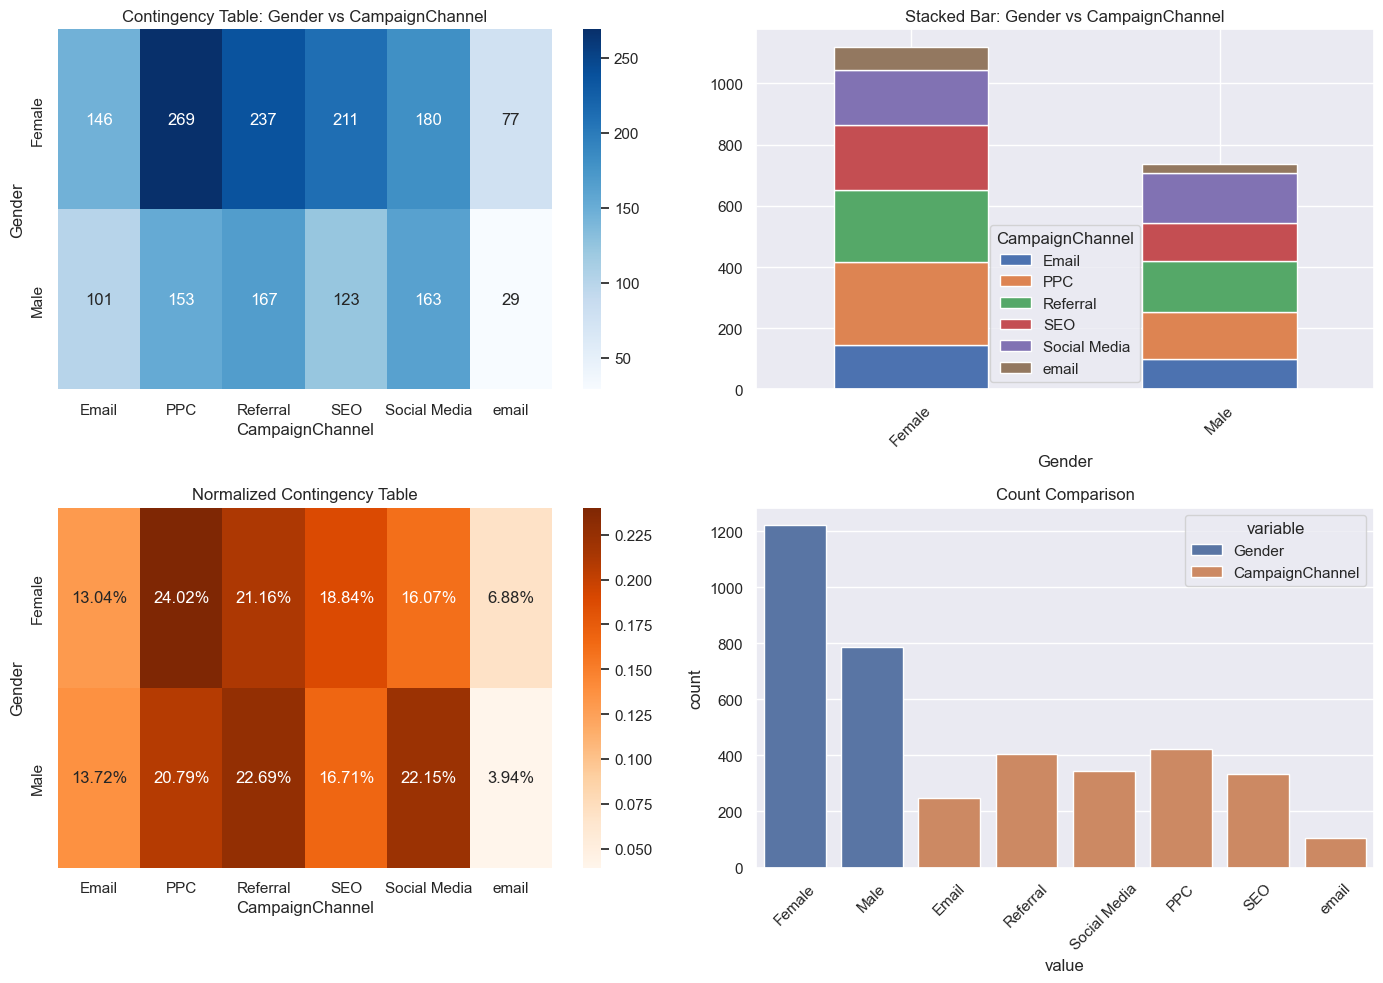

=============== Gender vs CampaignChannel ===============
Contingency Table:
CampaignChannel  Email  PPC  Referral  SEO  Social Media  email
Gender                                                         
Female             146  269       237  211           180     77
Male               101  153       167  123           163     29

Chi-square Test Results:
                                 
chi2_statistic           19.35775
p_value                   0.00165
degrees_of_freedom              5
cramers_v                 0.10213
association_strength     moderate
significant_association      True


In [7]:
describe_cat_cat_relationship(data , 'Gender' , 'CampaignChannel')
